In [1]:
import pandas as pd

# stock data

## Loading data

In [2]:
stock_Brazil=pd.read_csv("Stock major indicies/Bovespa Historical Data_Brazil.csv")

In [3]:
stock_Brazil['Country']='Brazil'

In [5]:
stock_India=pd.read_csv("Stock major indicies/BSE Sensex 30 Historical Data_India.csv")

In [6]:
stock_India['Country']='India'

In [7]:
stock_France=pd.read_csv("Stock major indicies/CAC 40 Historical Data_Paris.csv")

In [8]:
stock_France['Country']='France'

In [9]:
stock_France

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","4,524.53","4,547.99","4,555.44","4,514.15",-,0.39%,France
1,"Apr 09, 2020","4,506.85","4,512.30","4,543.69","4,409.04",126.59M,1.44%,France
2,"Apr 08, 2020","4,442.75","4,397.36","4,442.75","4,333.09",96.26M,0.10%,France
3,"Apr 07, 2020","4,438.27","4,489.40","4,527.60","4,379.27",146.54M,2.12%,France
4,"Apr 06, 2020","4,346.14","4,298.50","4,353.21","4,268.52",141.47M,4.61%,France
...,...,...,...,...,...,...,...,...
322,"Jan 08, 2019","4,773.27","4,722.16","4,810.27","4,719.23",101.15M,1.15%,France
323,"Jan 07, 2019","4,719.17","4,757.01","4,760.27","4,690.22",76.19M,-0.38%,France
324,"Jan 04, 2019","4,737.12","4,649.63","4,750.51","4,636.79",98.94M,2.72%,France
325,"Jan 03, 2019","4,611.49","4,641.80","4,671.28","4,607.68",81.18M,-1.66%,France


In [10]:
stock_Germany=pd.read_csv("Stock major indicies/DAX Historical Data_Germany.csv")

In [11]:
stock_Germany['Country']='Germany'

In [12]:
stock_Germany

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","10,678.50","10,743.48","10,744.23","10,671.23",-,1.08%,Germany
1,"Apr 09, 2020","10,564.74","10,490.65","10,649.79","10,311.70",134.48M,2.24%,Germany
2,"Apr 08, 2020","10,332.89","10,301.56","10,340.79","10,198.22",102.43M,-0.23%,Germany
3,"Apr 07, 2020","10,356.70","10,464.11","10,590.41","10,225.02",149.51M,2.79%,Germany
4,"Apr 06, 2020","10,075.17","9,889.03","10,097.31","9,841.49",126.69M,5.77%,Germany
...,...,...,...,...,...,...,...,...
318,"Jan 08, 2019","10,803.98","10,750.19","10,910.71","10,745.03",96.57M,0.52%,Germany
319,"Jan 07, 2019","10,747.81","10,814.39","10,814.47","10,681.27",73.35M,-0.18%,Germany
320,"Jan 04, 2019","10,767.69","10,533.94","10,786.34","10,483.90",98.29M,3.37%,Germany
321,"Jan 03, 2019","10,416.66","10,467.11","10,538.66","10,400.11",87.35M,-1.55%,Germany


In [13]:
stock_US=pd.read_csv("Stock major indicies/Dow Jones Industrial Average Historical Data_US.csv")
# There is two us indexes which should we choose? (S&P 500 Historical Data_US.csv)

In [14]:
stock_US['Country']='US'

In [15]:
stock_US

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 13, 2020","23,390.77","23,698.93","23,698.93","23,095.35",396.56M,-1.39%,US
1,"Apr 09, 2020","23,719.37","23,690.66","24,008.99","23,504.09",568.72M,1.22%,US
2,"Apr 08, 2020","23,433.57","22,893.47","23,513.40","22,682.99",476.09M,3.44%,US
3,"Apr 07, 2020","22,653.86","23,537.44","23,617.24","22,634.45",595.87M,-0.12%,US
4,"Apr 06, 2020","22,679.99","21,693.63","22,783.45","21,693.63",614.20M,7.73%,US
...,...,...,...,...,...,...,...,...
317,"Jan 08, 2019","23,787.45","23,680.32","23,864.65","23,581.45",317.42M,1.09%,US
318,"Jan 07, 2019","23,531.35","23,474.26","23,687.74","23,301.59",334.20M,0.42%,US
319,"Jan 04, 2019","23,433.16","22,894.92","23,518.64","22,894.92",396.02M,3.29%,US
320,"Jan 03, 2019","22,686.22","23,176.39","23,176.39","22,638.41",424.24M,-2.83%,US


In [16]:
stock_UK=pd.read_csv("Stock major indicies/FTSE 100 Historical Data_UK.csv")

In [17]:
stock_UK['Country']='UK'

In [18]:
stock_UK

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","5,818.97","5,893.10","5,893.10","5,809.10",-,-0.41%,UK
1,"Apr 09, 2020","5,842.66","5,677.73","5,842.66","5,677.68",1.28B,2.90%,UK
2,"Apr 08, 2020","5,677.73","5,704.45","5,704.45","5,589.73",1.10B,-0.46%,UK
3,"Apr 07, 2020","5,704.25","5,716.90","5,781.60","5,643.10",-,2.18%,UK
4,"Apr 06, 2020","5,582.39","5,415.50","5,590.58","5,415.50",1.21B,3.08%,UK
...,...,...,...,...,...,...,...,...
320,"Jan 08, 2019","6,861.60","6,810.88","6,901.48","6,804.89",672.10M,0.74%,UK
321,"Jan 07, 2019","6,810.88","6,837.42","6,874.11","6,778.01",759.33M,-0.39%,UK
322,"Jan 04, 2019","6,837.42","6,692.66","6,850.37","6,692.50",658.88M,2.16%,UK
323,"Jan 03, 2019","6,692.66","6,734.23","6,753.14","6,685.09",694.92M,-0.62%,UK


In [19]:
stock_Italy=pd.read_csv("Stock major indicies/FTSE MIB Historical Data_Italy.csv")

In [20]:
stock_Italy['Country']='Italy'

In [21]:
stock_Italy

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","17,741.00","17,847.50","17,852.50","17,697.50",-,0.68%,Italy
1,"Apr 09, 2020","17,621.62","17,685.56","17,756.01","17,360.48",553.98M,1.39%,Italy
2,"Apr 08, 2020","17,380.82","17,212.38","17,405.79","17,196.03",476.31M,-0.18%,Italy
3,"Apr 07, 2020","17,411.72","17,587.81","17,887.12","17,177.73",679.85M,2.19%,Italy
4,"Apr 06, 2020","17,039.31","16,769.13","17,053.91","16,764.81",528.13M,4.00%,Italy
...,...,...,...,...,...,...,...,...
319,"Jan 08, 2019","19,000.14","18,978.14","19,193.13","18,922.45",411.45M,0.25%,Italy
320,"Jan 07, 2019","18,953.27","18,917.43","18,968.04","18,800.20",337.62M,0.65%,Italy
321,"Jan 04, 2019","18,831.79","18,375.60","18,832.17","18,373.35",427.68M,3.37%,Italy
322,"Jan 03, 2019","18,218.40","18,211.83","18,425.18","18,152.75",432.40M,-0.61%,Italy


In [22]:
stock_Spain=pd.read_csv("Stock major indicies/IBEX 35 Historical Data_Spain.csv")

In [23]:
stock_Spain['Country']='Spain'

In [24]:
stock_Spain

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","7,137.50","7,208.00","7,217.00","7,103.50",-,0.95%,Spain
1,"Apr 09, 2020","7,070.60","7,049.30","7,116.80","6,918.70",240.35M,1.71%,Spain
2,"Apr 08, 2020","6,951.80","6,930.20","6,952.50","6,860.60",155.91M,-0.72%,Spain
3,"Apr 07, 2020","7,002.00","6,986.90","7,119.10","6,903.60",260.86M,2.30%,Spain
4,"Apr 06, 2020","6,844.30","6,807.90","6,874.90","6,728.60",225.97M,3.99%,Spain
...,...,...,...,...,...,...,...,...
322,"Jan 08, 2019","8,847.30","8,783.10","8,895.90","8,773.40",160.82M,0.81%,Spain
323,"Jan 07, 2019","8,776.30","8,781.20","8,783.50","8,710.40",128.76M,0.44%,Spain
324,"Jan 04, 2019","8,737.80","8,593.80","8,774.30","8,588.10",169.09M,2.52%,Spain
325,"Jan 03, 2019","8,523.30","8,497.50","8,590.90","8,488.10",135.07M,-0.31%,Spain


In [25]:
stock_Korea=pd.read_csv("Stock major indicies/KOSPI Historical Data_South Korea.csv")

In [26]:
stock_Korea['Country']='Korea'

In [27]:
stock_Korea

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","1,857.08","1,846.41","1,864.46","1,837.17",872.12K,1.72%,Korea
1,"Apr 13, 2020","1,825.76","1,853.30","1,853.30","1,825.76",1.01M,-1.88%,Korea
2,"Apr 10, 2020","1,860.70","1,835.76","1,861.10","1,824.43",992.55M,1.33%,Korea
3,"Apr 09, 2020","1,836.21","1,838.09","1,839.33","1,818.30",920.57M,1.61%,Korea
4,"Apr 08, 2020","1,807.14","1,815.75","1,842.16","1,801.80",907.49M,-0.90%,Korea
...,...,...,...,...,...,...,...,...
313,"Jan 08, 2019","2,025.27","2,038.68","2,042.70","2,023.59",397.83M,-0.58%,Korea
314,"Jan 07, 2019","2,037.10","2,034.24","2,048.06","2,030.90",440.19M,1.34%,Korea
315,"Jan 04, 2019","2,010.25","1,992.40","2,011.56","1,984.53",408.99M,0.83%,Korea
316,"Jan 03, 2019","1,993.70","2,011.81","2,014.72","1,991.65",427.98M,-0.81%,Korea


In [28]:
stock_Japan=pd.read_csv("Stock major indicies/Nikkei 225 Historical Data_Japan.csv")

In [29]:
stock_Japan['Country']='Japan'

In [30]:
stock_Japan

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","19,630.00","19,135.00","19,717.50","19,075.50",-,3.08%,Japan
1,"Apr 13, 2020","19,043.40","19,312.04","19,355.04","19,014.32",656.32M,-2.33%,Japan
2,"Apr 10, 2020","19,498.50","19,500.07","19,500.07","19,235.96",874.94M,0.79%,Japan
3,"Apr 09, 2020","19,345.77","19,376.00","19,406.96","19,158.55",822.67M,-0.04%,Japan
4,"Apr 08, 2020","19,353.24","19,047.76","19,454.34","18,730.80",1.06B,2.13%,Japan
...,...,...,...,...,...,...,...,...
304,"Jan 10, 2019","20,163.80","20,270.88","20,345.92","20,101.93",759.63M,-1.29%,Japan
305,"Jan 09, 2019","20,427.06","20,366.30","20,494.35","20,331.20",750.92M,1.10%,Japan
306,"Jan 08, 2019","20,204.04","20,224.67","20,347.92","20,106.36",891.35M,0.82%,Japan
307,"Jan 07, 2019","20,038.97","19,944.61","20,266.22","19,920.80",840.26M,2.44%,Japan


In [31]:
stock_Denmark=pd.read_csv("Stock major indicies/OMX Copenhagen 20 Historical Data_Denmark.csv")

In [32]:
stock_Denmark

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 14, 2020","1,094.17","1,098.88","1,103.16","1,091.72",5.36M,0.50%
1,"Apr 08, 2020","1,088.72","1,090.20","1,093.56","1,076.64",16.13M,-0.68%
2,"Apr 07, 2020","1,096.14","1,108.55","1,115.23","1,091.08",24.96M,0.45%
3,"Apr 06, 2020","1,091.19","1,105.63","1,107.17","1,084.49",17.23M,0.80%
4,"Apr 03, 2020","1,082.55","1,064.52","1,082.55","1,055.57",18.23M,1.66%
...,...,...,...,...,...,...,...
314,"Jan 08, 2019",933.16,924.97,938.57,922.62,15.00M,0.87%
315,"Jan 07, 2019",925.11,919.98,927.28,912.99,12.79M,0.58%
316,"Jan 04, 2019",919.77,902.22,919.77,902.22,12.36M,2.04%
317,"Jan 03, 2019",901.35,901.99,905.05,894.99,10.72M,-0.16%


In [33]:
stock_Denmark['Country']='Denmark'

In [34]:
stock_Denmark

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","1,094.17","1,098.88","1,103.16","1,091.72",5.36M,0.50%,Denmark
1,"Apr 08, 2020","1,088.72","1,090.20","1,093.56","1,076.64",16.13M,-0.68%,Denmark
2,"Apr 07, 2020","1,096.14","1,108.55","1,115.23","1,091.08",24.96M,0.45%,Denmark
3,"Apr 06, 2020","1,091.19","1,105.63","1,107.17","1,084.49",17.23M,0.80%,Denmark
4,"Apr 03, 2020","1,082.55","1,064.52","1,082.55","1,055.57",18.23M,1.66%,Denmark
...,...,...,...,...,...,...,...,...
314,"Jan 08, 2019",933.16,924.97,938.57,922.62,15.00M,0.87%,Denmark
315,"Jan 07, 2019",925.11,919.98,927.28,912.99,12.79M,0.58%,Denmark
316,"Jan 04, 2019",919.77,902.22,919.77,902.22,12.36M,2.04%,Denmark
317,"Jan 03, 2019",901.35,901.99,905.05,894.99,10.72M,-0.16%,Denmark


In [35]:
stock_Australia=pd.read_csv("Stock major indicies/S&P_ASX 200 Historical Data_Austrila.csv")

In [36]:
stock_Australia

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 14, 2020","5,488.10","5,387.30","5,490.70","5,360.00",1.15B,1.87%
1,"Apr 09, 2020","5,387.30","5,206.90","5,387.30","5,206.90",914.16M,3.46%
2,"Apr 08, 2020","5,206.90","5,252.30","5,321.00","5,121.90",1.15B,-0.86%
3,"Apr 07, 2020","5,252.30","5,286.80","5,423.10","5,187.00",1.11B,-0.65%
4,"Apr 06, 2020","5,286.80","5,067.50","5,302.20","5,067.50",890.07M,4.33%
...,...,...,...,...,...,...,...
319,"Jan 08, 2019","5,722.40","5,683.20","5,733.70","5,666.60",548.87M,0.69%
320,"Jan 07, 2019","5,683.20","5,619.40","5,716.20","5,619.40",439.61M,1.14%
321,"Jan 04, 2019","5,619.40","5,633.40","5,633.40","5,568.70",475.82M,-0.25%
322,"Jan 03, 2019","5,633.40","5,557.80","5,646.50","5,557.80",451.33M,1.36%


In [37]:
stock_Australia['Country']='Australia'

In [38]:
stock_Canada=pd.read_csv("Stock major indicies/S&P_TSX Composite Historical Data_Canada.csv")

In [39]:
stock_Canada

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 13, 2020","14,075.94","14,195.12","14,197.58","13,889.25",326.41M,-0.64%
1,"Apr 09, 2020","14,166.63","14,081.97","14,329.19","14,010.67",437.30M,1.73%
2,"Apr 08, 2020","13,925.71","13,725.95","13,964.92","13,588.40",374.16M,2.29%
3,"Apr 07, 2020","13,614.14","13,937.92","14,062.71","13,571.48",400.92M,0.16%
4,"Apr 06, 2020","13,592.70","13,362.37","13,603.00","13,300.13",386.78M,5.06%
...,...,...,...,...,...,...,...
317,"Jan 08, 2019","14,605.15","14,610.51","14,645.61","14,533.89",260.10M,0.70%
318,"Jan 07, 2019","14,504.13","14,470.98","14,515.12","14,383.06",257.83M,0.54%
319,"Jan 04, 2019","14,426.62","14,351.57","14,438.60","14,314.79",231.24M,1.50%
320,"Jan 03, 2019","14,212.75","14,294.10","14,297.89","14,155.27",211.59M,-0.94%


In [40]:
stock_Canada['Country']='Canada'

In [41]:
stock_China=pd.read_csv("Stock major indicies/Shanghai Composite Historical Data_China.csv")

In [42]:
stock_China['Country']='China'

In [43]:
stock_China

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","2,827.28","2,794.80","2,827.30","2,789.44",202.70K,1.59%,China
1,"Apr 13, 2020","2,783.05","2,784.60","2,792.89","2,774.08",17.71B,-0.49%,China
2,"Apr 10, 2020","2,796.63","2,827.19","2,833.01","2,789.98",23.35B,-1.04%,China
3,"Apr 09, 2020","2,825.90","2,825.84","2,832.40","2,820.43",23.82B,0.37%,China
4,"Apr 08, 2020","2,815.37","2,805.92","2,823.21","2,800.30",24.35B,-0.19%,China
...,...,...,...,...,...,...,...,...
306,"Jan 08, 2019","2,526.46","2,530.30","2,531.34","2,520.16",15.81B,-0.26%,China
307,"Jan 07, 2019","2,533.09","2,528.70","2,536.98","2,515.51",17.73B,0.72%,China
308,"Jan 04, 2019","2,514.87","2,446.02","2,515.32","2,440.91",16.89B,2.05%,China
309,"Jan 03, 2019","2,464.36","2,461.78","2,488.48","2,455.93",12.44B,-0.04%,China


In [46]:
stock_SouthAfrica=pd.read_csv("Stock major indicies/South-Africa-Top-40-Historical-Data_South-Africa.csv")

In [47]:
stock_SouthAfrica['Country']='South Africa'

In [48]:
stock_SouthAfrica

,Date,Price,Open,High,Low,Vol.,Change %,Country
0,"Apr 14, 2020","45,580.91","43,837.45","45,677.23","43,837.45",252.73M,3.98%,South Africa
1,"Apr 09, 2020","43,837.45","42,772.20","43,881.66","42,506.12",262.16M,2.49%,South Africa
2,"Apr 08, 2020","42,772.20","43,590.00","43,593.98","42,495.36",229.01M,-1.88%,South Africa
3,"Apr 07, 2020","43,590.00","42,534.54","44,309.88","42,508.05",294.52M,2.48%,South Africa
4,"Apr 06, 2020","42,534.54","40,873.41","42,780.16","40,873.41",191.15M,4.06%,South Africa
...,...,...,...,...,...,...,...,...
316,"Jan 08, 2019","46,116.17","45,876.36","46,289.31","45,876.36",118.85M,0.52%,South Africa
317,"Jan 07, 2019","45,876.36","46,156.11","47,110.66","45,738.94",92.31M,-0.61%,South Africa
318,"Jan 04, 2019","46,156.11","45,622.51","46,156.11","45,519.18",69.64M,1.17%,South Africa
319,"Jan 03, 2019","45,622.51","45,310.14","45,851.78","45,131.16",76.72M,0.69%,South Africa


In [49]:
stock_data=pd.concat([stock_Brazil,stock_India,stock_France,stock_Germany,stock_US,stock_UK,stock_Italy,stock_Spain,stock_Korea,stock_Japan,stock_Denmark,stock_Australia,stock_Canada,stock_China,stock_SouthAfrica])

In [50]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

## Basic information

In [51]:
print("Total number of observations: {}".format(len(stock_data)))

Total number of observations: 4804


In [52]:
stock_data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Country'], dtype='object')

In [53]:
stock_data.Country.unique()

array(['Brazil', 'India', 'France', 'Germany', 'US', 'UK', 'Italy',
       'Spain', 'Korea', 'Japan', 'Denmark', 'Australia', 'Canada',
       'China', 'South Africa'], dtype=object)

We will first take a look at how the data is distributed for dates

In [54]:
stock_data.Date.min()

Timestamp('2019-01-01 00:00:00')

In [55]:
stock_data.Date.max()

Timestamp('2020-04-14 00:00:00')

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\clara\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


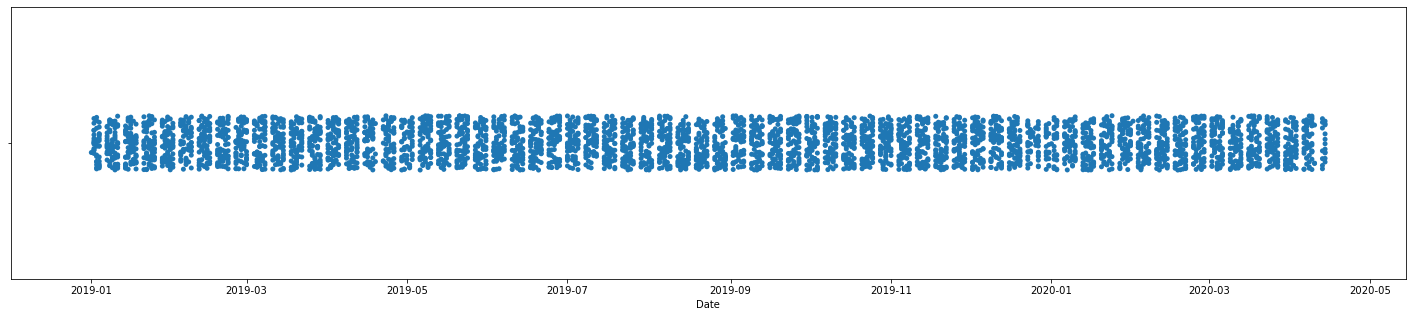

In [57]:
fig,ax =plt.subplots(figsize=(25,5))
ax = sns.stripplot(x=stock_data.Date)

We see that there is no observations for weekends which we need to pay attention to when working with the data set.

We will now try and look at the data 